# Temperature and flow solutions

In [1]:
%load_ext autoreload
%autoreload 2
#%run ct_data.py '../crunchtope_model/results.nc' -c pH totcon
%run pf_data.py '../pflotran_model/flow_steady_state/steady_flow.h5'
%run figures.py
import cmcrameri.cm as cm

Error: The following variables are not in the xarray object: ['Forsterite_VF', 'Fayalite_VF']. Mineral not found.
Assuming flow only simulation, data available.


Text(0, 0.5, 'z / m')

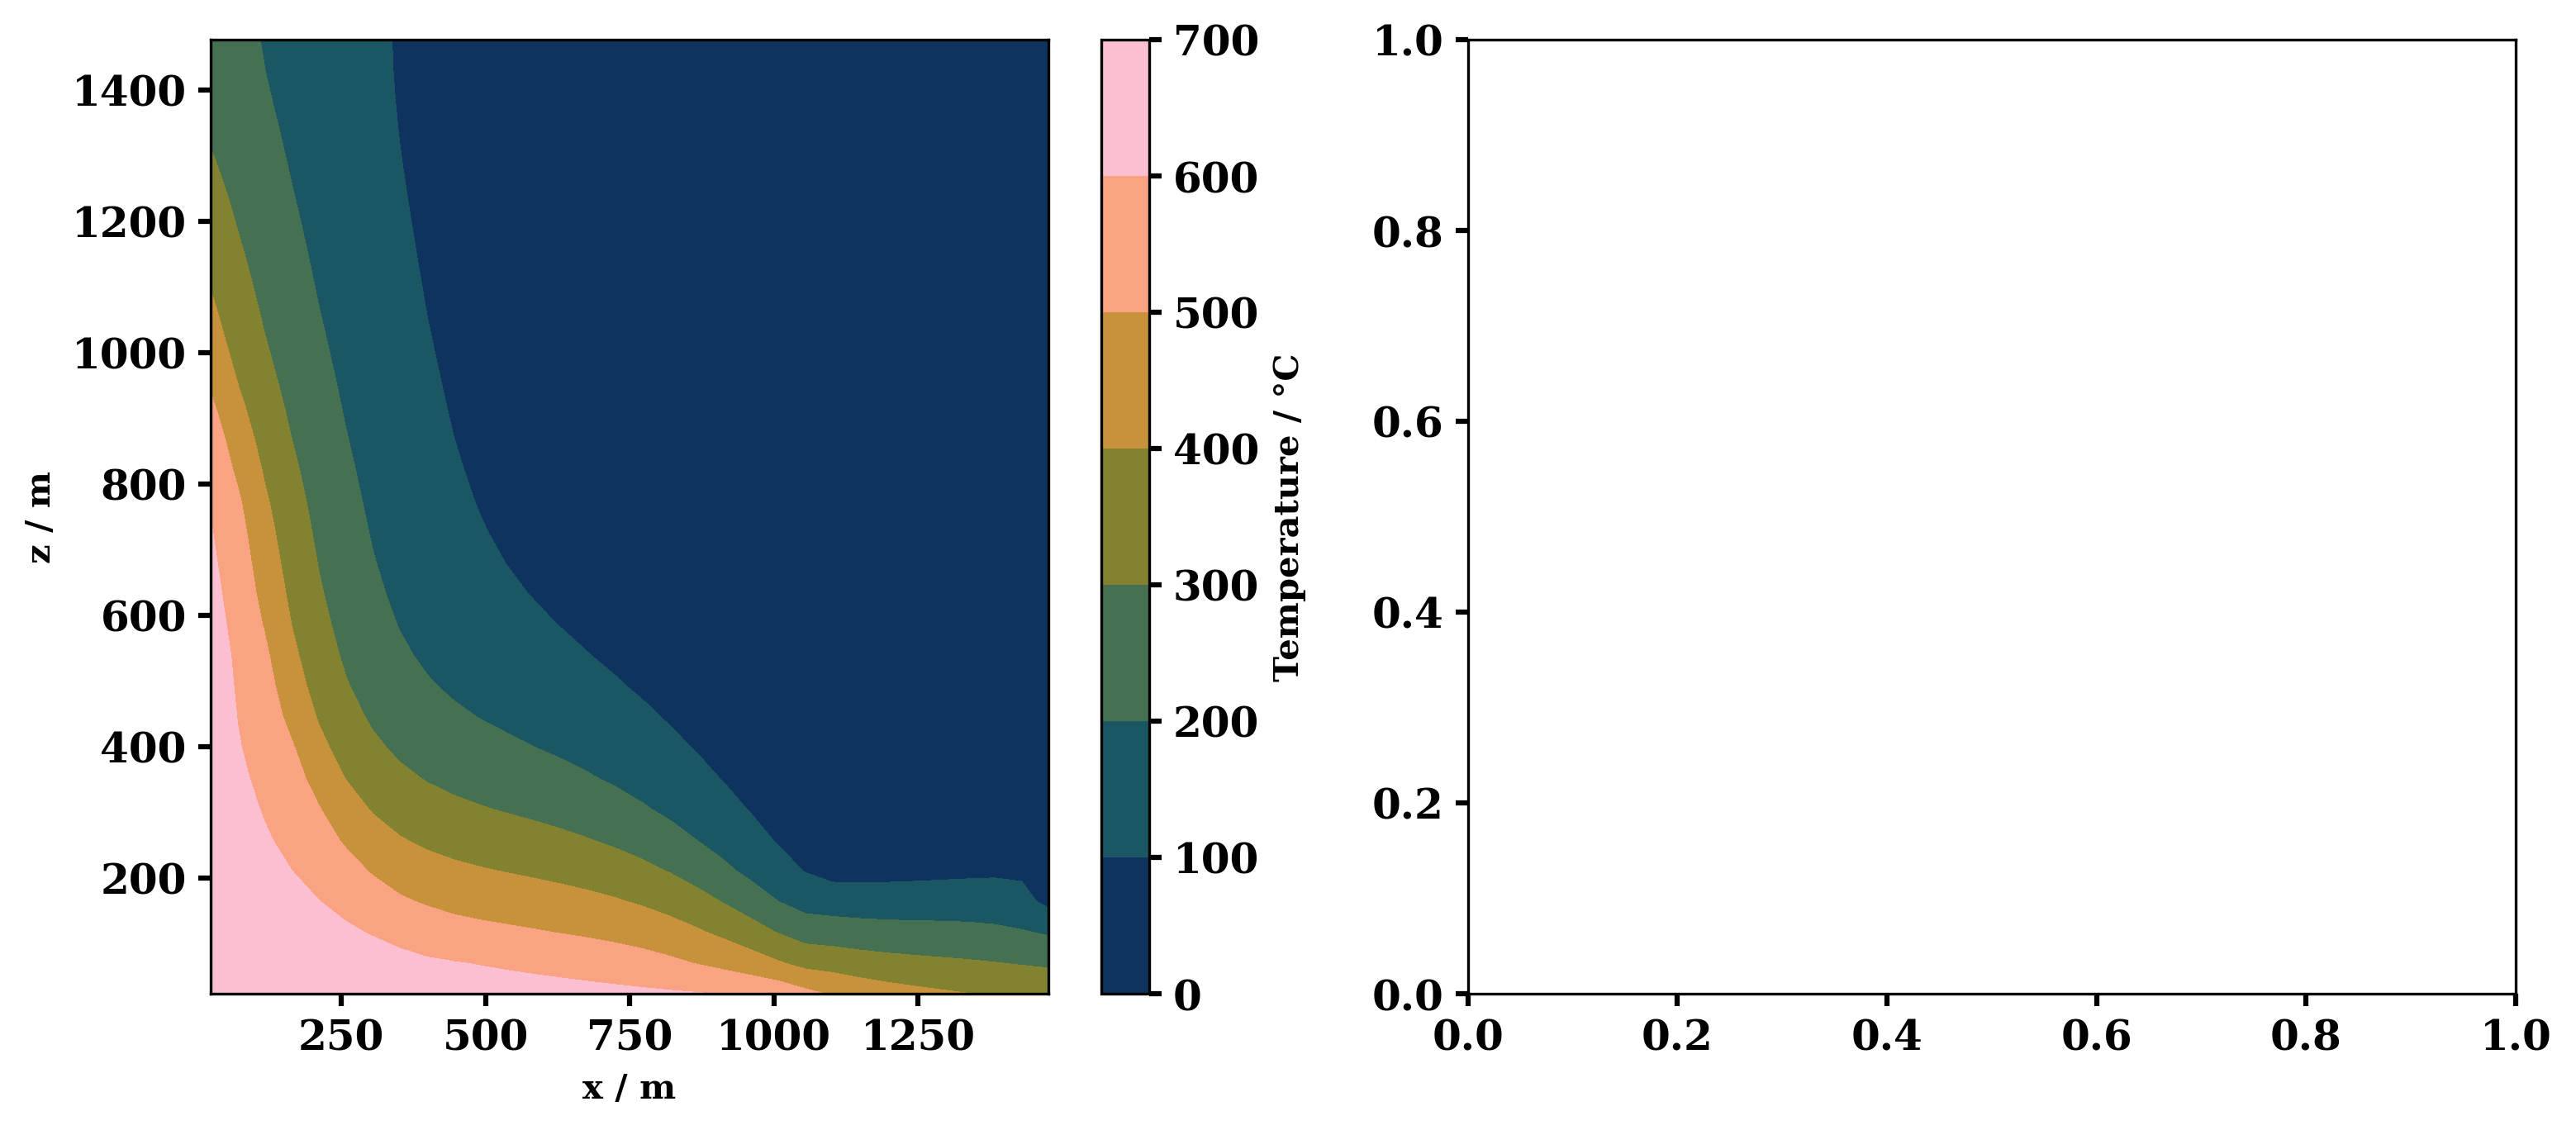

In [2]:
import matplotlib.pyplot as plt
plt.style.use('custom.mplstyle')
import xarray as xr

ds = pf_data

# Assuming 'ds' is your xarray dataset and 'temperature' is the variable of interest
# Replace 'ds' with the actual dataset name
temperature = ds.Temperature.isel(y=0, time=-1)

# Extract X and Z spatial coordinates
x = ds.coords['x']  # Replace 'X' with actual x-coordinate name if different
z = ds.coords['z']  # Replace 'Z' with actual z-coordinate name if different

# Create the contour plot
fig, ax = plt.subplots(1,2, figsize=(12, 5))
contour = ax[0].contourf(x, z, temperature, cmap=cm.batlow)

# Add color bar for temperature
fig.colorbar(contour, label='Temperature / °C')

# Label axes
ax[0].set_xlabel('x / m')
ax[0].set_ylabel('z / m')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Select the velocity slices at y=0 and for the nearest time step at time=1000
x_velocity_slice = ds['Liquid X-Velocity'].isel(y=0).sel(time=1000, method='nearest').values
z_velocity_slice = ds['Liquid Z-Velocity'].isel(y=0).sel(time=1000, method='nearest').values

speed = np.sqrt(x_velocity_slice**2 + z_velocity_slice**2)

# Extract X and Z coordinates
x = ds.coords['x'].values  # 1D X array
z = ds.coords['z'].values  # 1D Z array

x_velocity_slice = x_velocity_slice.T  # Transpose to match (Z, X)
z_velocity_slice = z_velocity_slice.T  # Transpose to match (Z, X)
permeability = np.log10(pf_data['Permeability'].isel(y=0).sel(time=1000, method='nearest').values.T)

# Create meshgrid from X and Z coordinates
X, Z = np.meshgrid(x, z)

# Create the stream plot for X and Z velocities
strm = ax[1].streamplot(X, Z, u=x_velocity_slice, v=z_velocity_slice, density=2, color='w', linewidth=0.5, arrowsize=1, arrowstyle='->')

from matplotlib.colors import BoundaryNorm
cmap = plt.get_cmap('viridis')
levels = [-15.69897, -14.69897, -13.69897, -12.69897]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Use pcolormesh for sharp, blocky rendering
cmap = plt.get_cmap(cm.batlow)
norm = plt.Normalize(vmin=min(levels), vmax=max(levels))

# Plot with pcolormesh
mesh = ax[1].pcolormesh(X, Z, permeability, cmap=cmap, norm=norm)

# Label the axesaa
ax[1].set_xlabel('X / m')
ax[1].set_ylabel('Z / m')
cbar = fig.colorbar(mesh, label = 'Permeability / log10(m$^2$)')

# Add capital letter labels to the subplots
for i, axis in enumerate(ax):
    import string
    if i = 0:
        c = 'w'
    else:
        c = 'k'
    axis.text(0.99, 0.99, string.ascii_uppercase[i], transform=axis.transAxes,
              fontsize=16, fontweight='bold', va='top', c='w')

# Adjust layout and save the figure
fig.tight_layout()
fig.savefig('output/figure_s2.png', dpi=300)

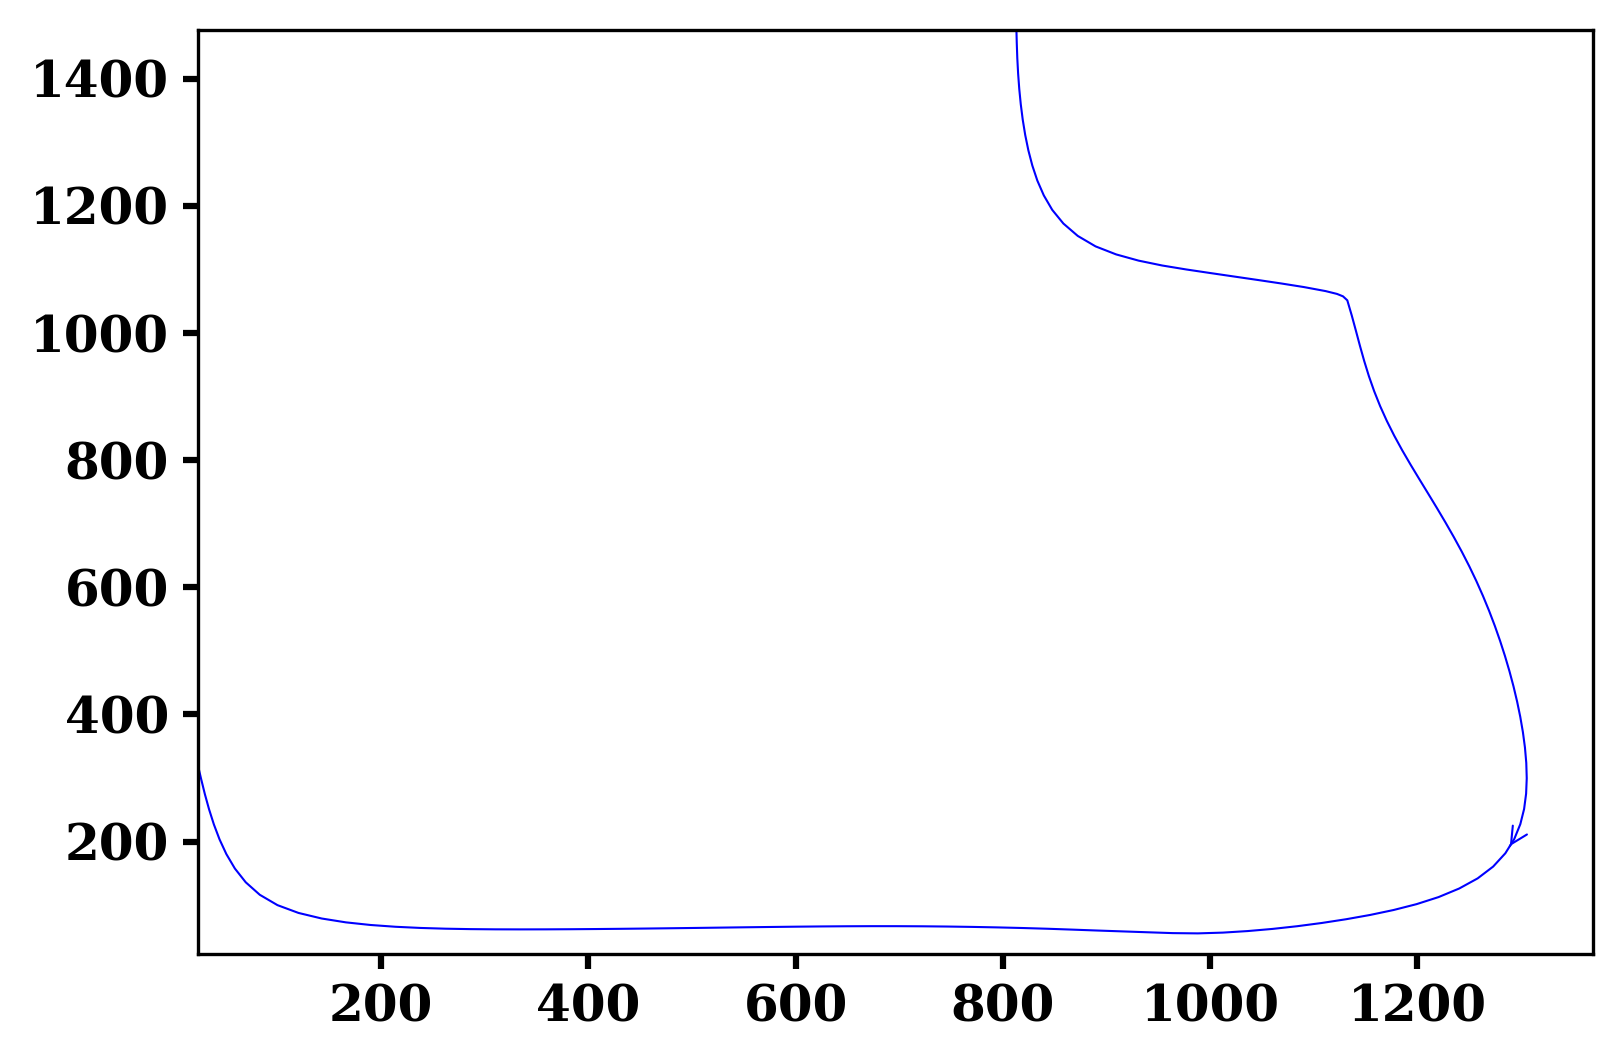

Total length of the streamline: 2982.78 units


2.040682782619124

In [4]:
# Function to calculate the average speed along a streamline
def average_speed_along_streamline(streamline_data):
    # Get the coordinates and velocities along the first streamline
    U = x_velocity_slice
    V = z_velocity_slice
    y=z
    
    x_coords = []
    y_coords = []
    # Extract x, y coordinates from the streamline
    for path in streamline_data.lines.get_paths():
        x_coords.append(path.vertices[0, 0])
        y_coords.append(path.vertices[0, 1])

    # Interpolate the velocity (U, V) and speed at these points
    interpolated_speeds = []
    for (x_val, y_val) in zip(x_coords, y_coords):
        u_val = np.interp(x_val, x, U[:, np.argmin(np.abs(y - y_val))])
        v_val = np.interp(y_val, y, V[np.argmin(np.abs(x - x_val)), :])
        interpolated_speeds.append(np.sqrt(u_val**2 + v_val**2))

    # Calculate the average speed along the streamline
    avg_speed = np.mean(interpolated_speeds) / 0.01
    return avg_speed

# Function to calculate the length of a streamline
def streamline_length(streamline_data):
    total_length = 0  # Initialize total length to 0

    # Loop through each streamline in the streamline data
    for path in streamline_data.lines.get_paths():
        # Extract x, y coordinates from the streamline vertices
        x_coords = path.vertices[:, 0]
        y_coords = path.vertices[:, 1]

        # Loop through the vertices and calculate the distance between consecutive points
        for i in range(1, len(x_coords)):
            x1, y1 = x_coords[i - 1], y_coords[i - 1]
            x2, y2 = x_coords[i], y_coords[i]

            # Calculate the distance between the two points
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

            # Add the distance to the total length
            total_length += distance

    return total_length

strm = plt.streamplot(X, Z, u=x_velocity_slice, v=z_velocity_slice, density=2, start_points=[[100,100]], color='b', linewidth=0.5, arrowsize=1, arrowstyle='->')

plt.show()
# Example usage: calculate the length of streamlines from the streamplot result
streamline_data = strm  # This is your streamline data from plt.streamplot
length = streamline_length(streamline_data)
print(f"Total length of the streamline: {length:.2f} units")


average_speed_along_streamline(strm)